In [22]:
import numpy as np
import math
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
np.random.seed(42)

In [23]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_train, y_train,X_test, y_test = mnist.train.images, mnist.train.labels,mnist.test.images,mnist.test.labels


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [24]:
X_train = X_train/255
X_test = X_test/255

In [25]:
x = tf.placeholder(tf.float32, [None,784])
y = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.truncated_normal(shape=[784, 100], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[100]))
h1 = tf.nn.relu(tf.matmul(x, W1) + b1)

W2 = tf.Variable(tf.truncated_normal(shape=[100, 10], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[10]))
h1 = tf.nn.relu(tf.matmul(x,W1)+b1)
y_ = tf.nn.softmax(tf.matmul(h1, W2) + b2)

In [43]:
decay_rate = tf.constant(0.001, tf.float32)
alpha  = tf.constant(0.2,tf.float32)
ep = tf.placeholder(tf.float32)# placeholder for the epoch number
alpha0 = alpha/(1+decay_rate*ep)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=alpha0).minimize(cost)

In [44]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :]
    shuffled_Y = Y[permutation, :].reshape((m,Y.shape[1]))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m, :]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [45]:
init = tf.global_variables_initializer()
num_epochs = 50
mini_batch_size = 1024
seed = 0
costs = []
sess = tf.Session()
sess.run(init)
for epoch in range(num_epochs):
    epoch_cost = 0
    seed = seed + 1
    minibatches = random_mini_batches(X_train, y_train, mini_batch_size, seed)
    for minibatch in minibatches:
        (minibatch_X, minibatch_Y) = minibatch
        _,minibatch_cost = sess.run([optimizer,cost], feed_dict={x:minibatch_X, y:minibatch_Y, ep:epoch})
        epoch_cost+= minibatch_cost
    print("Cost after "+str(epoch+1)+"/"+str(num_epochs)+": "+str(epoch_cost))
    costs.append(epoch_cost)

Cost after 1/50: 104.50816082954407
Cost after 2/50: 87.95666217803955
Cost after 3/50: 87.04646396636963
Cost after 4/50: 86.65191090106964
Cost after 5/50: 86.41416299343109
Cost after 6/50: 86.17150330543518
Cost after 7/50: 85.92438745498657
Cost after 8/50: 85.94139909744263
Cost after 9/50: 85.8227401971817
Cost after 10/50: 85.57160007953644
Cost after 11/50: 85.54379677772522
Cost after 12/50: 85.53970766067505
Cost after 13/50: 85.39308774471283
Cost after 14/50: 85.31047010421753
Cost after 15/50: 85.21961653232574
Cost after 16/50: 85.25460660457611
Cost after 17/50: 85.294646859169
Cost after 18/50: 85.18242013454437
Cost after 19/50: 85.10908687114716
Cost after 20/50: 85.14970266819
Cost after 21/50: 85.18917334079742
Cost after 22/50: 82.94170773029327
Cost after 23/50: 81.29558157920837
Cost after 24/50: 80.93593287467957
Cost after 25/50: 80.88064312934875
Cost after 26/50: 80.66107749938965
Cost after 27/50: 80.58031070232391
Cost after 28/50: 80.61478900909424
Cost a

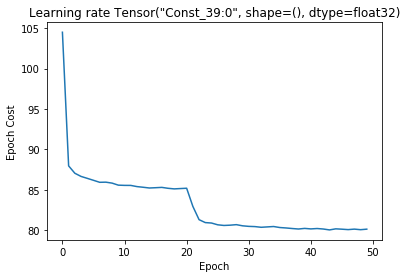

In [46]:
plt.plot(costs)
plt.xlabel('Epoch')
plt.ylabel('Epoch Cost')
plt.title('Learning rate '+str(alpha))
plt.show()

In [47]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Train Accuracy: "+str(sess.run(accuracy, feed_dict={x: X_train, y: y_train})*100))
print("Test Accuracy: "+str(sess.run(accuracy, feed_dict={x: X_test, y: y_test})*100))

Train Accuracy: 97.77091145515442
Test Accuracy: 96.3100016117096
